<a href="https://colab.research.google.com/github/igorgcgv/igorgcgv/blob/main/An%C3%A1lise_de_Dados_no_Ramo_da_Educa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados no Ramo da Educação** <p>
**por: @igorcavalcante** - [Linkedin](https://www.linkedin.com/in/https://www.linkedin.com/in/igorgcavalcante//) <p>


**Sobre o conjunto de dados**
Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas.

**Introdução**
Vamos tentar entender a influência dos antecedentes dos pais, preparação para testes etc. no desempenho dos alunos.

[Download dos Dados](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [1]:
#Importando as bibliotecas que iremos ultilizar nessa análise
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Lendo a Base de Dados
Base_Dados = pd.read_csv('StudentsPerformance.csv')

# dimensão
Base_Dados.shape

(1000, 8)

In [6]:
# Head
Base_Dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


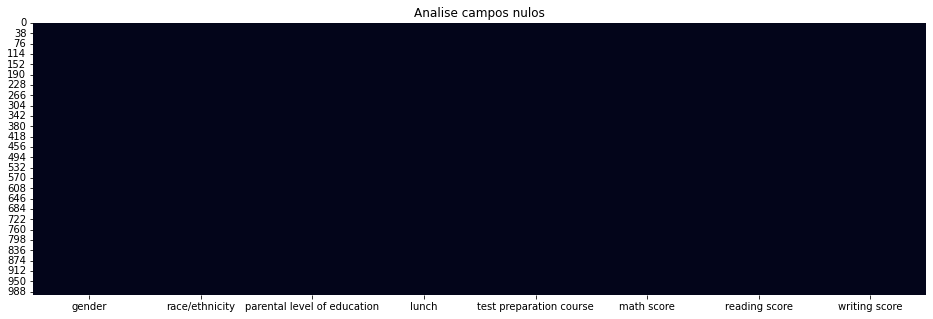

In [7]:
# Campos nulos
Nulos = Base_Dados.isnull()

plt.figure( figsize=(16,5 ) )
plt.title('Analise campos nulos')
sns.heatmap( Nulos, cbar=False );

In [8]:
# Verificando os Unicos
Base_Dados.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# Campos duplicados
Base_Dados.duplicated().sum()

0

In [10]:
# Estatistca
Base_Dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# Gerando informações na nossa base de dados
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
#Verificando a proporção de  Feminino e Masculino
Base_Dados['gender'].value_counts( normalize=True ) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

In [13]:
#Verificando a proporção de  Entre os Grupos
Base_Dados['race/ethnicity'].value_counts( normalize=True ) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [14]:
#Verificando a proporção de  entre os níveis de escolaridade dos pais
Base_Dados['parental level of education'].value_counts( normalize=True ) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [15]:
#Verificando a proporção de  entre os tipos de alimentação consumido dentro da escola
Base_Dados['lunch'].value_counts( normalize=True ) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

In [ ]:
#Verificando a proporção de  quem fez alguma preparação para prova e os que não optaram por preparação
Base_Dados['test preparation course'].value_counts( normalize=True ) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

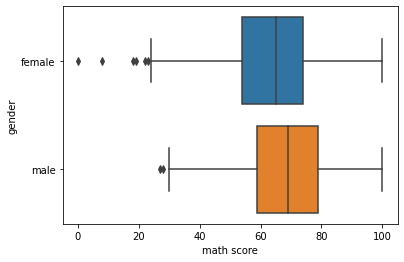

In [16]:
#Podemos ver nesse boxplot a distribuição das notas de matemática segmentada por gênero, onde o masculino se sobresai do femino.
sns.boxplot( data=Base_Dados, x='math score', y='gender');


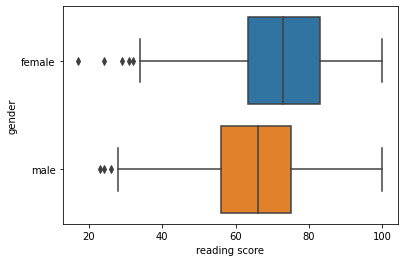

In [17]:
##Podemos ver nesse boxplot a distribuição das notas de escrita segmentada por gênero, onde o feminino possui uma maior mediana, porém tem alguns outliners, mas mesmo assim obteve maiores notas comparadas com o masculino.
sns.boxplot( data=Base_Dados, x='reading score', y='gender');

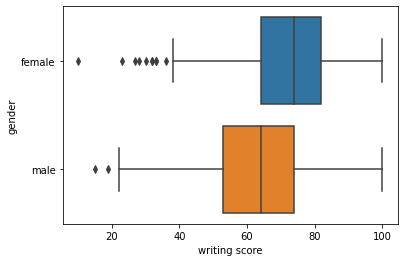

In [18]:
#Podemos ver nesse boxplot a distribuição das notas de leitura segmentada por gênero, onde o feminino se sobresai do masculino.
sns.boxplot( data=Base_Dados, x='writing score', y='gender');

In [19]:
Base_Dados.groupby( by=['gender'] ).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


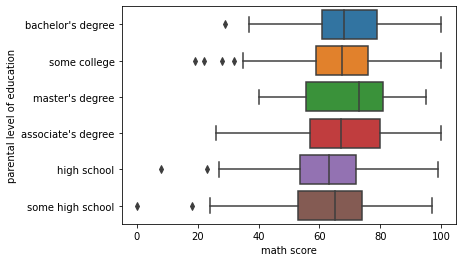

In [20]:
#Podemos ver nesse boxplot a distribuição das notas de matemática segmentada por grau de escolaridade dos pais, é visivel que isso influência na nota dos filhos
sns.boxplot( data=Base_Dados, x='math score', y='parental level of education')

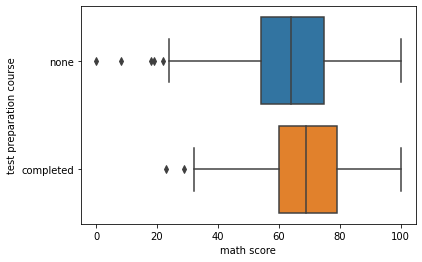

In [21]:
#Podemos ver nesse boxplot a distribuição das notas de matemática, segmentada por quem escolheu se preparar ou não. É nítido, que quem se preparou obteve maiores notas.
sns.boxplot( data=Base_Dados, x='math score', y='test preparation course')

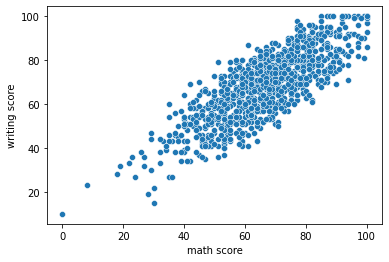

In [24]:
#Verificando se a correlação entre a nota de matemática e de leitura. Podemos ver que há uma correlação positiva.
sns.scatterplot( data=Base_Dados, x='math score', y='writing score')